In [1]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras.layers.experimental import preprocessing

import numpy as np

import pandas as pd

import statistics as stat

import matplotlib.pyplot as plt
from numpy import inf

In [2]:
#read the file 
data= pd.read_csv('pharmacy_tx.csv') 
data
drugsplit=data['drug'].str.split(" ",n=1,expand=True)
data['Type']=drugsplit[0]
data['Drug']=drugsplit[1]
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate
...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,colifunene
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,tafistitrisin
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,tanoclolol
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,prazinib


In [3]:
#Categorical Variables 
data.Drug=data.Drug.astype('category').cat.codes
pd.get_dummies(data['rejected'])
data.loc[:,"True Rejected"] = pd.get_dummies(data['rejected'])[True].copy()
pd.get_dummies(data['Type'])
data.loc[:,'branded'] = pd.get_dummies(data['Type'])['branded'].copy()
data.diagnosis=data.diagnosis.astype('category').cat.codes
data.bin=data.bin.astype('category').cat.codes
data.pcn=data.pcn.astype('category').cat.codes
data.group=data.group.astype('category').cat.codes


In [4]:
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug,True Rejected,branded
0,2022-01-02,Pharmacy #6,37,branded tanoclolol,8,0,-1,False,13.39,branded,67,0,1
1,2022-01-02,Pharmacy #42,102,branded oxasoted,5,-1,4,False,7.02,branded,48,0,1
2,2022-01-02,Pharmacy #37,89,branded cupitelol,8,0,-1,False,13.39,branded,8,0,1
3,2022-01-02,Pharmacy #30,102,generic oxasoted,4,21,5,False,10.84,generic,48,0,0
4,2022-01-02,Pharmacy #18,75,branded mamate,5,-1,47,False,47.00,branded,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,100,branded colifunene,2,-1,20,True,0.00,branded,7,1,1
13910240,2022-12-30,Pharmacy #45,76,generic tafistitrisin,5,-1,38,False,6.28,generic,66,0,0
13910241,2022-12-30,Pharmacy #54,115,generic tanoclolol,6,25,6,False,6.94,generic,67,0,0
13910242,2022-12-30,Pharmacy #0,52,branded prazinib,0,34,-1,False,13.93,branded,52,0,1


In [5]:
#All data
X= data[['diagnosis','bin','pcn','group', 'Drug','True Rejected', 'branded']]
Y= data['patient_pay']

## Too Much data, so maybe it would be better to take a random sample of n=1000

In [6]:
X= data[['diagnosis','bin','pcn','group', 'Drug','True Rejected', 'branded']]
data_used = data[['diagnosis','bin','pcn','group', 'Drug','True Rejected', 'branded','patient_pay']]

In [7]:
data_samp = data_used.sample(1000,random_state=365) #random sample of n=1000
data_samp
X_samp = data_samp[['diagnosis','bin','pcn','group', 'Drug','True Rejected', 'branded']]

In [8]:
Y_samp = data_samp['patient_pay'] #random sample of Y n=100
Y_samp

4032113      9.82
6721957     11.15
9488955      9.10
6410361     22.73
13239511    16.42
            ...  
1609099     10.54
1188586      6.28
3842348     16.41
8581717      5.94
9380273     17.91
Name: patient_pay, Length: 1000, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_samp, Y_samp,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [15]:
X_train

,diagnosis,bin,pcn,group,Drug,True Rejected,branded
11519796,86,2,4,-1,55,0,0
6740414,71,0,34,-1,66,0,1
5928183,100,4,-1,9,72,0,0
11694479,52,6,26,-1,52,0,1
12901003,51,8,0,-1,34,0,0
...,...,...,...,...,...,...,...
12476116,86,5,-1,36,40,0,0
12812679,102,5,-1,44,48,0,0
7253282,89,11,42,27,57,0,1
6545279,115,0,34,-1,54,0,0


# Single Layer NN with 4 nodes

In [194]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(4, activation='relu'), # single layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [195]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()

1005.435626181604

# Single Layer 16 nodes

In [196]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(16, activation='relu'), # single layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [197]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()  

1085.1490909345946

# Single layer 64 nodes

In [192]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'), # single layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [193]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()  

1594.7519719022396

# It seems like error increases as we increase nodes. 

## Trying 8, a number in between 4 and 16 

In [198]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(8, activation='relu'), # single layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [199]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()  

1045.9368085763176

# Still better with fewer nodes

# Now more Layers and we'll keep it constant at 3 neurons

In [168]:
#3,6, 10 layers with base 3 neurons

## 3 Layers 3 Neuron

In [169]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(3, activation='relu'), # first layer
    layers.Dense(3, activation='relu'),  # second layer
    layers.Dense(3, activation='relu'),  # Third layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [171]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()  

1014.5908749841675

## 6 layers 3 Neurons

In [200]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(3, activation='relu'), # first layer
    layers.Dense(3, activation='relu'),  # second layer
    layers.Dense(3, activation='relu'),  # Third layer
    layers.Dense(3, activation='relu'), # first layer
    layers.Dense(3, activation='relu'),  # second layer
    layers.Dense(3, activation='relu'),  # Third layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [201]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()  

1000.0816939717552

# 10 Layers 3 Neurons

In [202]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(3, activation='relu'), # first layer
    layers.Dense(3, activation='relu'),  # second layer
    layers.Dense(3, activation='relu'),  # Third layer
    layers.Dense(3, activation='relu'), # first layer
    layers.Dense(3, activation='relu'),  # second layer
    layers.Dense(3, activation='relu'),  # Third layer
    layers.Dense(3, activation='relu'),  # Third layer
    layers.Dense(3, activation='relu'), # first layer
    layers.Dense(3, activation='relu'),  # second layer
    layers.Dense(3, activation='relu'),  # Third layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [203]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()  

1028.6762854864714

#### 6 Layers gives us the lowest MSE

### It looks like it would be logical to try 4 nodes with 6 layers

In [53]:
# fit deep neural network

maxepo=800

dnn_model = tf.keras.Sequential([
    layers.Dense(4, activation='relu'), # single layer
    layers.Dense(4, activation='relu'),  # second layer
    layers.Dense(4, activation='relu'),  # Third layer
    layers.Dense(4, activation='relu'), # first layer
    layers.Dense(4, activation='relu'),  # second layer
    layers.Dense(4, activation='relu'),  # Third layer
    layers.Dense(1)
])

dnn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

dnn_model.fit(
    X_train, Y_train,
    validation_split=0,
    verbose=0, epochs=maxepo)

In [54]:
Ypred1=dnn_model.predict(X_test).flatten()
Ypred1
pred_error=((Ypred1)-Y_test)**2
pred_error.mean()  

1047.3061135884357

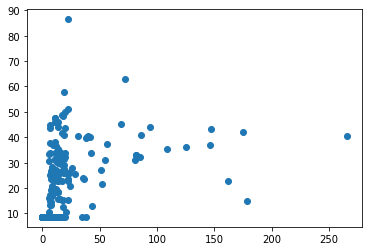

In [64]:
plt.scatter(Y_test, Ypred1,zorder=2)

In [ ]:
#outlier arent being predicted well

# 6 layers and 4-3 nodes gives us the best answer